# Graph

In [1]:
import json
import os
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

g = nx.Graph()
with open('data/edge_list.txt') as f:
    for line in f:
        a, b, c = line.strip().split()
        g.add_node(int(a))
        if int(c)>100:
            g.add_edge(int(a), int(b), weight = int(c))

with open('json/idAndName.json') as json_file:
    idAndName = json.load(json_file)
    
with open('json/top_game.json') as json_file:
    topGameStreamer = json.load(json_file)

with open('json/channels_name_flw.json') as json_file:
    channels_name_flw = json.load(json_file)
    
for i in range(500):
    g.nodes[int(idAndName[i]['id'])]['name'] = idAndName[i]['name']
    g.nodes[int(idAndName[i]['id'])]['followers'] = int(channels_name_flw[i]['followers'].replace(",", ""))
    g.nodes[int(idAndName[i]['id'])]['top_category'] = topGameStreamer[i]['top_game']

only_lol = [n for n,v in g.nodes(data=True) if v['top_category'] == 'League of Legends']
graph = g.subgraph(only_lol)
    
nx.write_gexf(graph, "data/lol.gexf")

In [2]:
print('Number of nodes: {}'.format(graph.order()))
print('Number of links: {}'.format(graph.size()))

Number of nodes: 76
Number of links: 500


In [3]:
density = nx.density(graph)
print('Density: {}'.format(density))

Density: 0.17543859649122806


## Degree analysis

In [4]:
degree = list(dict(graph.degree()).values())

In [5]:
# Degree analysis

print('Mean degree: {}'.format(np.mean(degree)))
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Mean degree: 13.157894736842104
Standard deviation: 10.28418897805209
Median: 10.0
Min: 0
Max: 32


## Follower-Degree relationship

Text(0, 0.5, 'Degree')

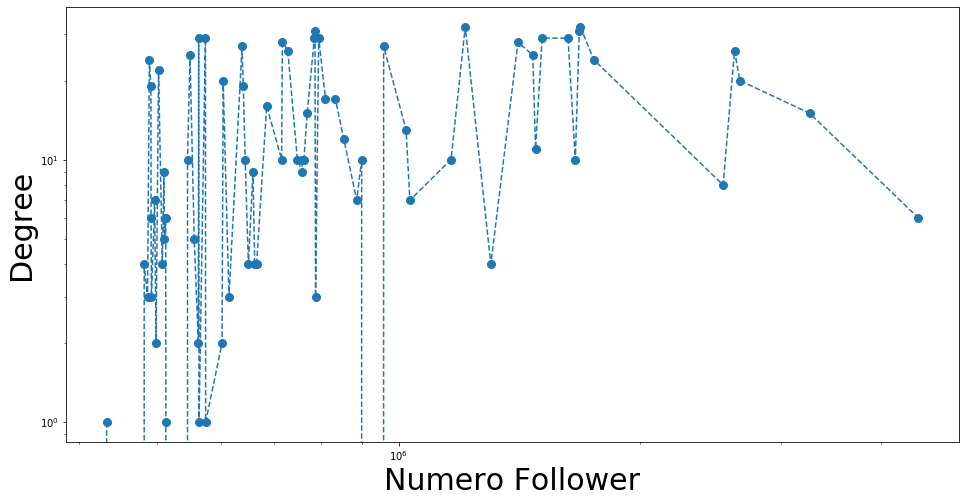

In [7]:
from operator import itemgetter

followers = []
for x, y in list(graph.nodes.data()):
    followers.append((y['followers'], graph.degree(x)))

followers.sort(key=itemgetter(0))

x = []
y = []
for i in followers:
    x.append(i[0])
    y.append(i[1])
    
fig_cdf = plt.figure(figsize=(16,8))
axes = fig_cdf.gca()
axes.loglog(x, y, marker='o', ms=8, linestyle='--')
axes.set_xlabel('Numero Follower', size=30)
axes.set_ylabel('Degree', size = 30)

## Pearson correlation coefficient

In [11]:
print(scipy.stats.pearsonr(x, y)[0])

0.2258118245097524
